# Лабораторная работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студенты гр. 1381 Исайкин Георгий Иванович и Петров Александр Сергеевич. Вариант №4.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

### Дискретный единичный скачок $\sigma_d(k)$:

$$\sigma_d(k)=\begin{cases}1 & k \geq 0 \\ 0 & k < 0\end{cases}$$

### Дискретный прямоугольный импульс $s_1(k)$:

$$s_1(k)=\begin{cases}U & n_0\leq k \leq n_0+n_{imp}-1 \\ 0 & k < 0\end{cases}$$

### Линейная комбинация дискретных гармонических сигналов $s_2(k)$:

$$s_2(k)=a_1x_1(k)+a_2x_2(k)+a_3x_3(k),$$
где $$x_i(k)=B_i\sin(\hat\omega_ik),~i=1,~2,~3,$$

### Дискретный гармонический сигнал $s_3(k)$:

$$s_3(k)=C*\cos(\hat\omega_0k)$$

## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинаций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Определим переменные:


In [2]:
# Вариант 4
Nb = 4 
N = 30 + Nb % 5
a = (-1) ** Nb * (0.8+0.005 * (Nb % 20))
C = 1 + Nb % 5
w0 = np.pi / (6 + Nb % 5)
U = Nb % 20 + 1
n0 = 3 + Nb % 5
n_imp = 5 + Nb % 5
B1 = 1.5 + Nb % 5
B2 = 5.7 - Nb % 5
B3 = 2.2 + Nb % 5
w1 = np.pi / (4 + Nb % 5)
w2 = np.pi / (8 + Nb % 5)
w3 = np.pi / (16 + Nb % 5)
a1 = 1.5 - Nb % 5
a2 = 0.7 + Nb % 5
a3 = 1.4 + Nb % 5

print(Nb, N, a, C, w0, U, n0, n_imp, B1, B2, B3, w1, w2, w3, a1, a2, a3, sep='\n')

4
34
0.8200000000000001
5
0.3141592653589793
5
7
9
5.5
1.7000000000000002
6.2
0.39269908169872414
0.2617993877991494
0.15707963267948966
-2.5
4.7
5.4


| Переменная             | Назначение        | Значение                    |
|-----------------|----------------------------------|----------------------------|
| $N$             | Длина последовательности        | N=34                       |
| $a$             | Основание экспоненты             | a=0.82                     |
| $C$             | Амплитуда гармонического сигнала | C=5                        |
| $\hat \omega_0$ | Частота гармонического сигнала   | w0=0.314                |
| $U$             | Амплитуда импульса               | U=5                        |
| $n_0$           | Начальный момент импульса        | n0=7                       |
| $n_{imp}$       | Длина импульса                   | n_imp=9                    |
| $B_1,~B_2,~B_3$ | Амплитуды гармонических сигналов | B1, B2, B3 = 5.5, 1.7, 6.2 |
| $\hat \omega_1,~\hat \omega_2,~\hat \omega_3$ | Частоты гармонических сигналов   | w1, w2, w3 = 0.392, 0.261, 0.157      |
| $a_1,~a_2,~a_3$                               | Коэффициенты линейной комбинации гармонических сигналов | a1, a2, a3 = -2.5, 4.7, 5.4                           |

### Пункт 1
Смоделировать дискретный прямоугольный импульс $s_1(k)$: $$s_1(k)=\begin{cases}U & n_0\leq k \leq n_0+n_{imp}-1 \\ 0 & x > 0\end{cases}$$ на основе дискретного единичного скачка $\sigma_d(k)$ из л/р №1 с выводом графика на интервале времени $n\in[0,~N-1]$. Пояснить как выполняется моделирование импульса.

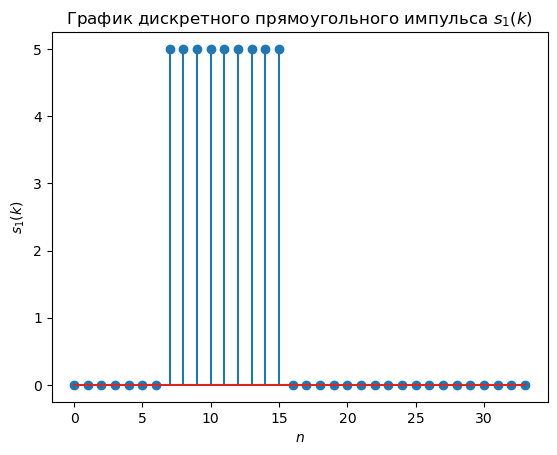

In [3]:
# Определим функцию sigma_d(k)
def sigma_d(k):
    return 1 if k>=0 else 0

# Определим необходимый интервал времени
df1 = pd.DataFrame({'n': range(N)})

# Определим функцию s1 через sigma_d
s1 = lambda k: (sigma_d(k-n0) - sigma_d(k-(n0+n_imp))) * U

# Применим функцию s1 к временному ряду
df1['s_1'] = df1['n'].apply(s1)

# Отрисуем полученный результат
plt.stem(df1['n'], df1['s_1'])
plt.xlabel('$n$')
plt.ylabel('$s_1(k)$')
plt.title('График дискретного прямоугольного импульса $s_1(k)$')
plt.show()

Смоделируем прямоугольный импульс $s_1​(k)$ через разность двух единичных скачков:
- $\sigma_d(k-n_0)$ - скачок, который начинает действовать в момент $(n_0)$
- $\sigma_d(k-(n_0+n_{imp}))$ - скачок, который начинает действовать в момент $(n_0+n_{imp})$

Разность этих двух скачков создаёт прямоугольный импульс длительностью $n_{imp}$ с амплитудой $1$. Домножив её на $U$, получим искомый импульс:
$$s_1(k)=U⋅(\sigma_d(k−n_0)−\sigma_d(k−(n_0+n_{imp})))$$

## Пункт 2
Смоделировать линейную комбинацию дискретных гармонических сигналов $s_2(k)$: $$s_2(k)=a_1x_1(k)+a_2x_2(k)+a_3x_3(k),$$ где $$x_i(k)=B_i\sin(\hat\omega_ik),~i=1,~2,~3,$$ с выводом графиков последовательностей $x_i(k)$ и $s_2(k)$ на интервале времени $n\in[0,~5N−1]$. Вычислить среднее значение (идентификатор ```mean_s2```), энергию (идентификатор ```E```) и среднюю мощность последовательности $s_2(k)$ (идентификатор ```P```). Пояснить:
- операции при моделировании линейной комбинации сигналов $s_2(k)$;
- как определяют указанные характеристики.


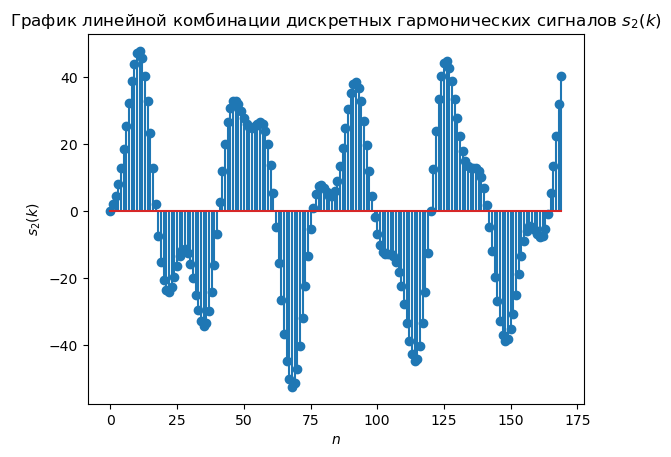

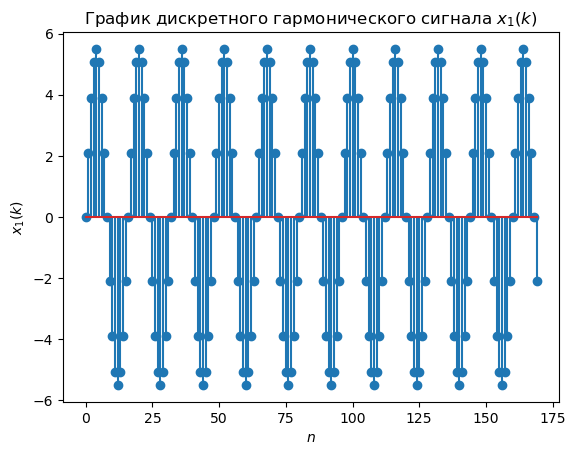

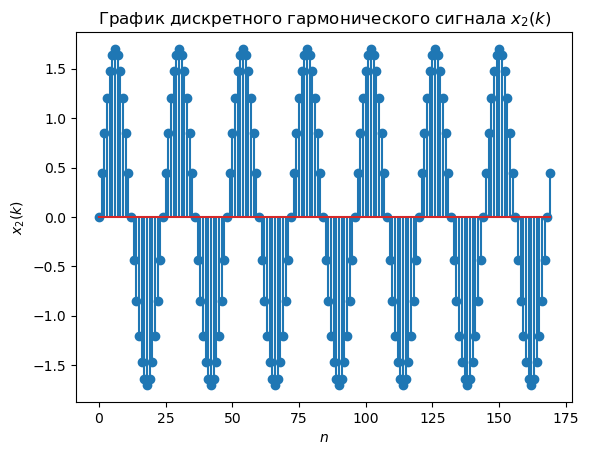

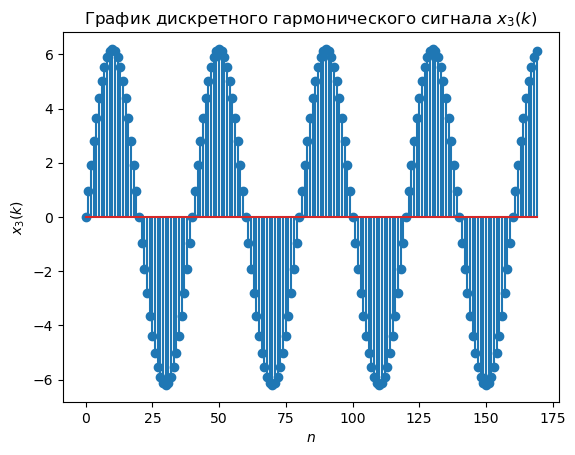

In [4]:
# Определим функцию дискретного комплексного гармоничного сигнала
def disc_harm_sig(k, C, w):
    return C * np.exp(1j * w * k)

# Определим функции x1, x2 и x3 через функцию дискретного комплексного гармонического сигнала
x1 = lambda k: np.imag(disc_harm_sig(k, B1, w1))
x2 = lambda k: np.imag(disc_harm_sig(k, B2, w2))
x3 = lambda k: np.imag(disc_harm_sig(k, B3, w3))

# Определим необходимый интервал времени
df2 = pd.DataFrame({'n': range(5*N)})

# Применим функции x1, x2 и x3 к временному ряду
df2['x_1'] = df2['n'].apply(x1)
df2['x_2'] = df2['n'].apply(x2)
df2['x_3'] = df2['n'].apply(x3)

# Определим s2 как сумму x1, x2 и x3 с заданными коэффициентами
s2 = lambda k: a1 * k['x_1'] + a2 * k['x_2'] + a3 * k['x_3']

# Применим функцию s2 к временному ряду
df2['s_2'] = df2[['x_1', 'x_2', 'x_3']].apply(s2, axis=1)

# Отрисуем полученный результат
plt.stem(df2['n'], df2['s_2'])
plt.xlabel('$n$')
plt.ylabel('$s_2(k)$')
plt.title('График линейной комбинации дискретных гармонических сигналов $s_2(k)$')
plt.show()

plt.stem(df2['n'], df2['x_1'])
plt.xlabel('$n$')
plt.ylabel('$x_1(k)$')
plt.title('График дискретного гармонического сигнала $x_1(k)$')
plt.show()

plt.stem(df2['n'], df2['x_2'])
plt.xlabel('$n$')
plt.ylabel('$x_2(k)$')
plt.title('График дискретного гармонического сигнала $x_2(k)$')
plt.show()

plt.stem(df2['n'], df2['x_3'])
plt.xlabel('$n$')
plt.ylabel('$x_3(k)$')
plt.title('График дискретного гармонического сигнала $x_3(k)$')
plt.show()

Зададим функции $x_i$ как мнимую часть дискретного комплексного гармоничного сигнала $B_i\exp(j\hat\omega_ik)$:$$x_i(k)=\mathrm{Im}(B_i\exp(j\hat\omega_ik))=\mathrm{Im}(B_i\cos(\hat\omega_ik)+jB_i\sin(\hat\omega_ik))=B_i\sin(\hat\omega_ik)$$
Для моделирования $s_2(k)$ просто складываем $x_i(k)$ c нужными коэффициентами $$s_2(k)=a_1x_1(k)+a_2x_2(k)+a_3x_3(k)$$

In [5]:
# Определим среднее значение mean_s2 на интервале [0, 5N-1]
mean_s2 = df2['s_2'].mean()
print("mean_s2 =", mean_s2)

# Определим энергию E на интревале [0, 5N-1]
E = df2['s_2'].pow(2).sum()
print('E =', E)

# Определим среднюю мощность P на интревале [0, 5N-1]
P = df2['s_2'].pow(2).mean()
print('P =', P)

mean_s2 = 0.789210650777783
E = 110847.78920679263
P = 652.045818863486


Для подсчёта характеристик используются следующие формулы:
- Среднее значение (```mean_s2```): $\frac1{5N}\sum_{k=0}^{5N-1}s_2(k)$
- Энергия (```E```): $\sum_{k=0}^{5N-1}{s_2}^2(k)$\
- Мощность (```P```): $\frac1{5N}\sum_{k=0}^{5N-1}{s_2}^2(k)$

### Пункт 3
Вывести график дискретного сигнала $s_3(k)$ представляющего собой дискретный гармонический сигнал $s(k)$: $$s(k)=\cos(\hat\omega_0k)$$ с экспоненциальной огибающей $|a|^k$, на интервале времени $n\in[0,~N−1]$. Привести аналитическую формулу дискретного сигнала $s_3(k)$ и пояснить операции при его моделировании.

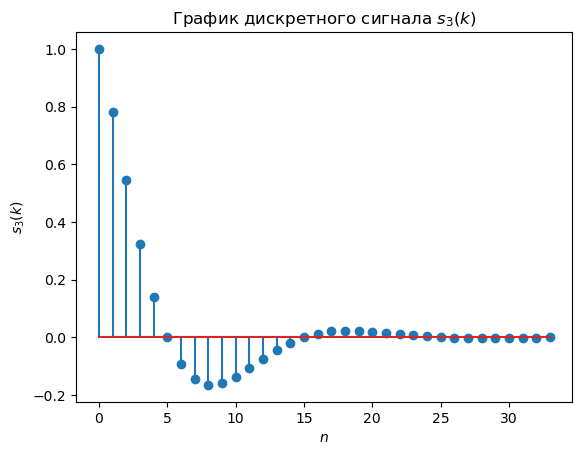

In [6]:
# Определим функцию s
s = lambda k: np.real(disc_harm_sig(k, 1, w0))

# Определим функцию s3
s3 = lambda k: np.abs(a) ** k * s(k)

# Определим необходимый интервал времени
df3 = pd.DataFrame({'n': range(N)})

# Применим функцию s3 к временному ряду
df3['s_3'] = df3['n'].apply(s3)

# Отрисуем полученный результат
plt.stem(df3['n'], df3['s_3'])
plt.xlabel('$n$')
plt.ylabel('$s_3(k)$')
plt.title('График дискретного сигнала $s_3(k)$')
plt.show()

Если $s_3(k)$ - это сигнал $s(k)$ с экспоненциальной огибающей $|a|^k$, тогда он равен сигналу $s(k)$, домноженному на $|a|^k$: $$s_3(k)=|a|^ks(k)=|a|^k\cos(\hat\omega_0k)$$

### Пункт 4
Вывести график пяти периодов периодической последовательности $s_4(k)$ дискретных прямоугольных импульсов амплитуды $U$ и длительности $n_{imp}$ с периодом, вдвое большим длительности импульса. Пояснить операции при моделировании периодической последовательности.

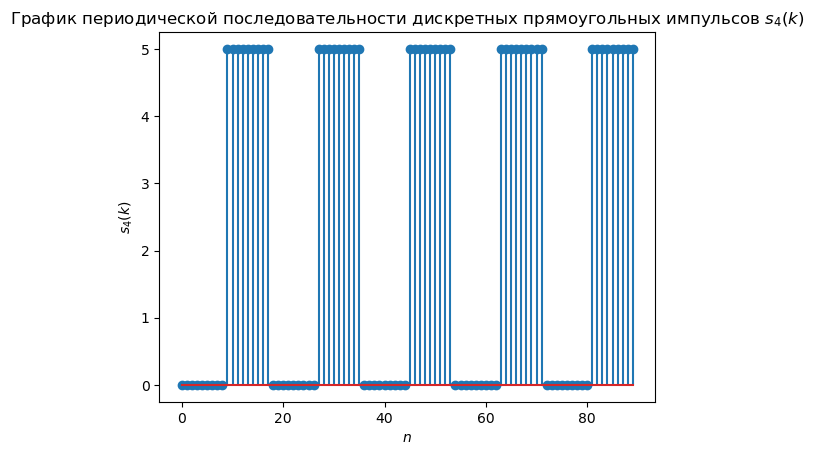

In [7]:
# Зададим период
T = n_imp * 2

# Определим необходимый интервал времени
df4 = pd.DataFrame({'n': range(T * 5)})

# Определим функцию s4
s4 = lambda k: U * sigma_d(k % T - n_imp)

# Применим функцию s4 к временному ряду
df4['s_4'] = df4['n'].apply(s4)

# Отрисуем полученный результат
plt.stem(df4['n'], df4['s_4'])
plt.xlabel('$n$')
plt.ylabel('$s_4(k)$')
plt.title('График периодической последовательности дискретных прямоугольных импульсов $s_4(k)$')
plt.show()

Для моделирования сигнала воспользуемся функцией $\sigma_d(k)$. Для того что бы задать периодичность необходимо вместо $k$ передать $k\bmod T$, где $T$ - период. Чтобы в течении $n_{imp}$ функция показывала 0 надо отнять $n_{imp}$ от $k\bmod T$, в результате получим $k\bmod T - n_{imp}$. Что бы амплитуда импульса была равна $U$, надо итоговый результат умножить на $U$. В итоге получаем: $$s_4(k)=U\sigma_d(k\bmod T-n_{imp})$$

Для того, что бы прямоугольный импульс был в начале периода, надо вместо $\sigma_d(k\bmod T - n_{imp})$ взять $\sigma_d(n_{imp} - k\bmod T)$

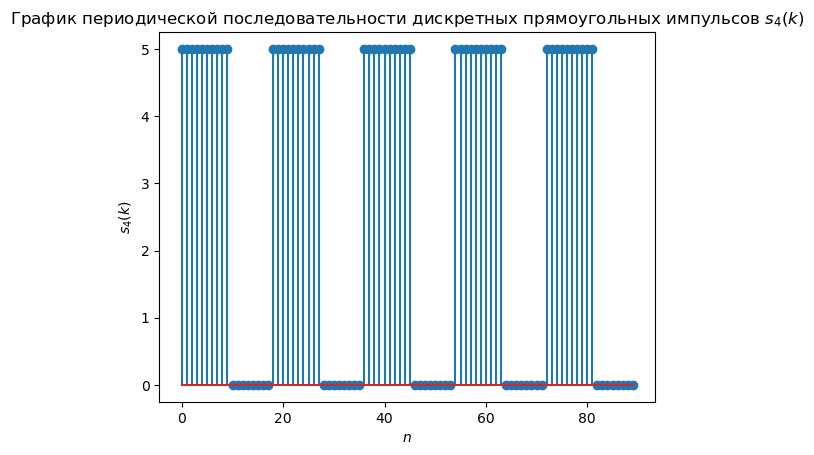

In [8]:
# Определим функцию s4 c импульсом в начале
s4 = lambda k: U * sigma_d(n_imp - k % T)

# Применим функцию s4 к временному ряду
df4['s_4'] = df4['n'].apply(s4)

# Отрисуем полученный результат
plt.stem(df4['n'], df4['s_4'])
plt.xlabel('$n$')
plt.ylabel('$s_4(k)$')
plt.title('График периодической последовательности дискретных прямоугольных импульсов $s_4(k)$')
plt.show()

## Выводы

В результате выполнения лабораторной работы изучены и смоделированы, а затем отображены на графиках:
- Дискретный прямоугольный сигнал;
- Линейная комбинация дискретных гармонических сигналов;
- Дискретный гармонический сигнал с экспоненциальной огибающей;
- Периодическая последовательность дискретных прямоугольных импульсов.

Также изучены на примере линейной комбинации дискретных гармонических сигналов способы вычисления следующих характеристик сигналов:
- Среднее значение;
- Энергия;
- Мощность.